In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_excel('AmesHousing.xlsx')
data

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [ ]:
numerical = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2',
      'Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF',
      'Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch',
      '3Ssn Porch','Screen Porch','Pool Area','Misc Val','SalePrice']
target = ['SalePrice']

nominal = ['PID','MS SubClass','MS Zoning','Street','Mas Vnr Type','Alley','Land Contour',
           'Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type',
          'House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd',
          'Mas Vnr Type','Foundation','Central Air','Garage Type','Misc Feature',
          'Sale Type','Sale Condition']

data_numeric = data[['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2',
      'Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF',
      'Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch',
      '3Ssn Porch','Screen Porch','Pool Area','Misc Val']]

data_nominal = data[['PID','MS SubClass','MS Zoning','Street','Mas Vnr Type','Alley','Land Contour',
           'Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type',
          'House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd',
          'Mas Vnr Type','Foundation','Central Air','Garage Type','Misc Feature',
          'Sale Type','Sale Condition']]

In [ ]:
data_numeric = data_numeric.fillna(0)
data_nominal = data_nominal.fillna('NA')
data_new = pd.concat([data_numeric,data_nominal],axis=1)

In [ ]:
data_new['Lot Frontage'] = data_new['Lot Frontage'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Lot Frontage'], errors='coerce')))


data_new['Mas Vnr Area'] = data_new['Mas Vnr Area'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Mas Vnr Area'], errors='coerce')))

data_new['Mas Vnr Area'] = data_new['Mas Vnr Area'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Mas Vnr Area'], errors='coerce')))

data_new['BsmtFin SF 1'] = data_new['BsmtFin SF 1'].replace('NA', 
    np.mean(pd.to_numeric(data_new['BsmtFin SF 1'], errors='coerce')))

data_new['BsmtFin SF 2'] = data_new['BsmtFin SF 2'].replace('NA', 
    np.mean(pd.to_numeric(data_new['BsmtFin SF 2'], errors='coerce')))

data_new['Bsmt Unf SF'] = data_new['Bsmt Unf SF'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Bsmt Unf SF'], errors='coerce')))

data_new['Total Bsmt SF'] = data_new['Total Bsmt SF'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Total Bsmt SF'], errors='coerce')))

data_new['Garage Area'] = data_new['Garage Area'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Garage Area'], errors='coerce')))

data_new['Misc Val'] = data_new['Misc Val'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Misc Val'], errors='coerce')))

data_new['Total Bsmt SF'] = data_new['Total Bsmt SF'].replace('NA', 
    np.mean(pd.to_numeric(data_new['Total Bsmt SF'], errors='coerce')))




data_new['SalePrice'] = data['SalePrice']

## 1

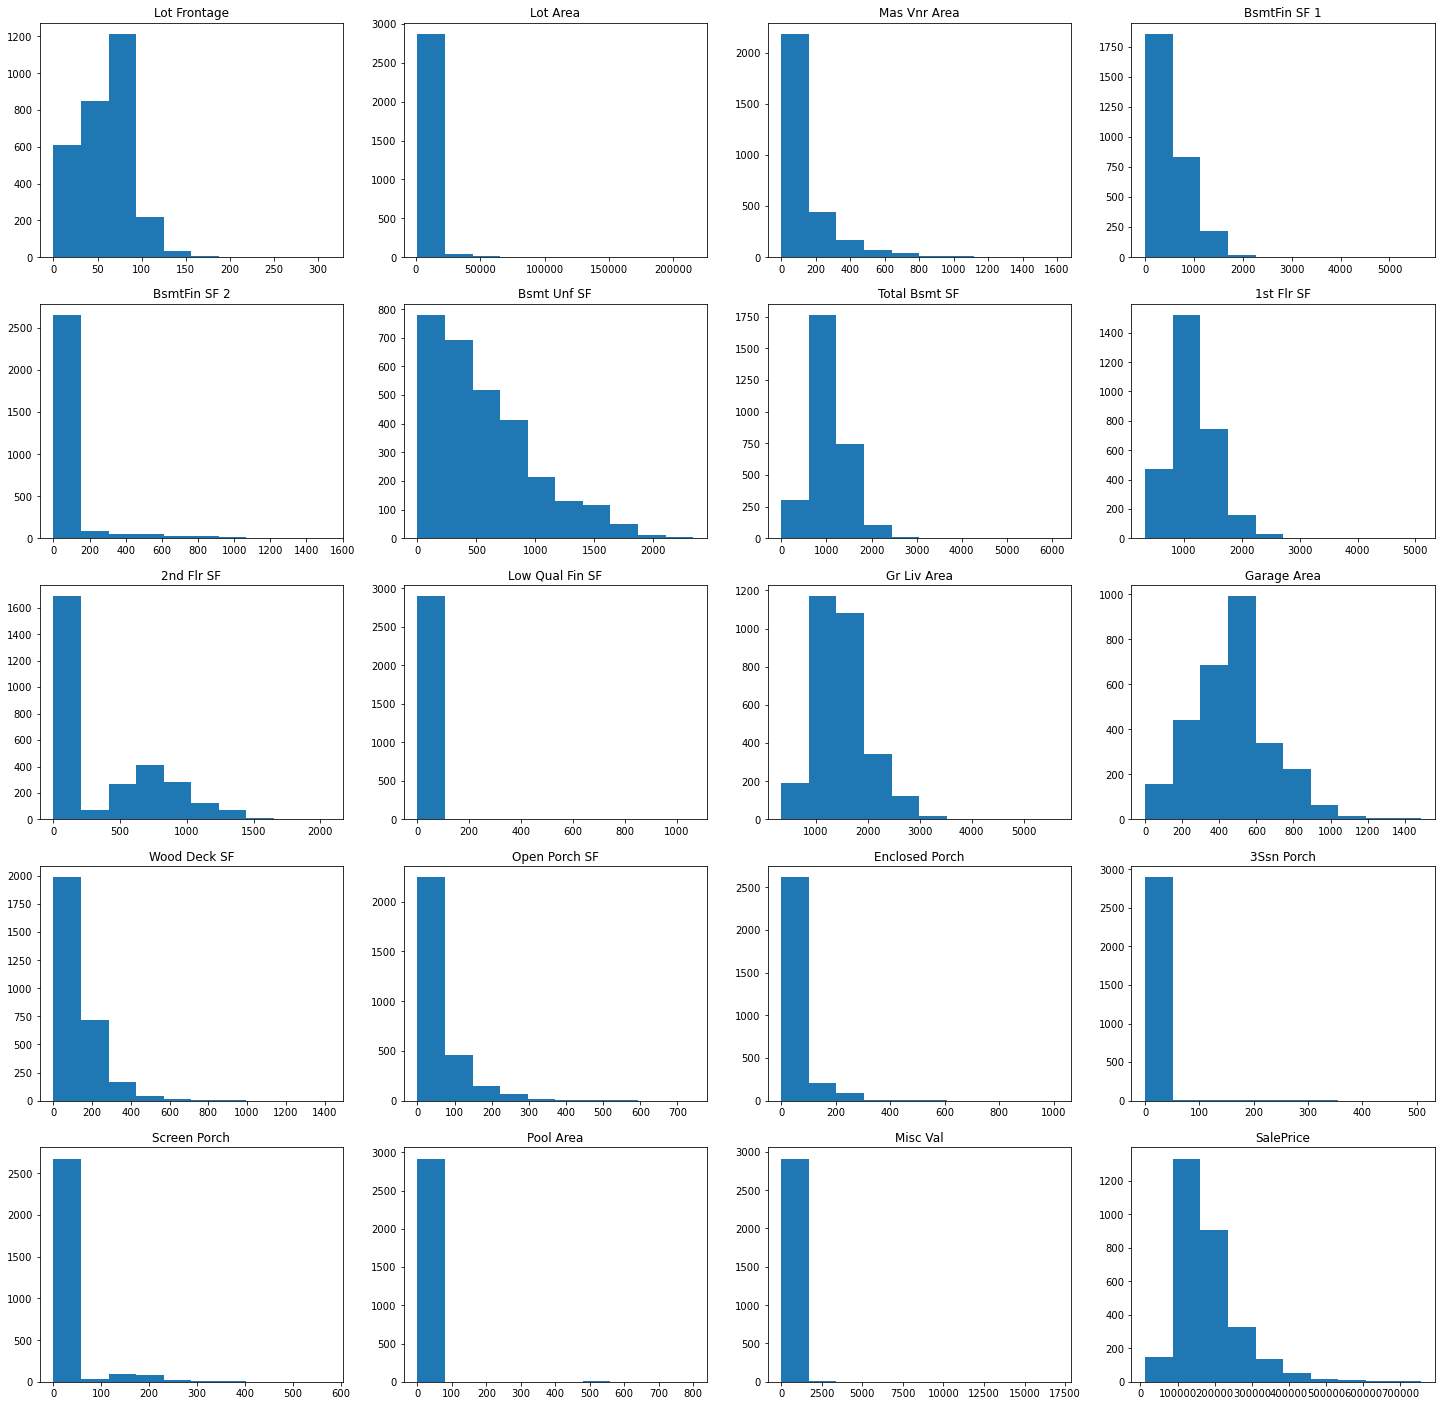

In [6]:
fig,ax = plt.subplots(5,4,figsize=(25,25))

num = 0
for i in range(len(ax)):
    for j in range(4):
        ax[i][j].hist(data_new[numerical[num]])
        ax[i][j].set_title(numerical[num])
        num=num+1

Observations - I noticed that many of the columns have zeros. if this is an error in the data it can be fixed or otherwise it has to stay the same

## 2

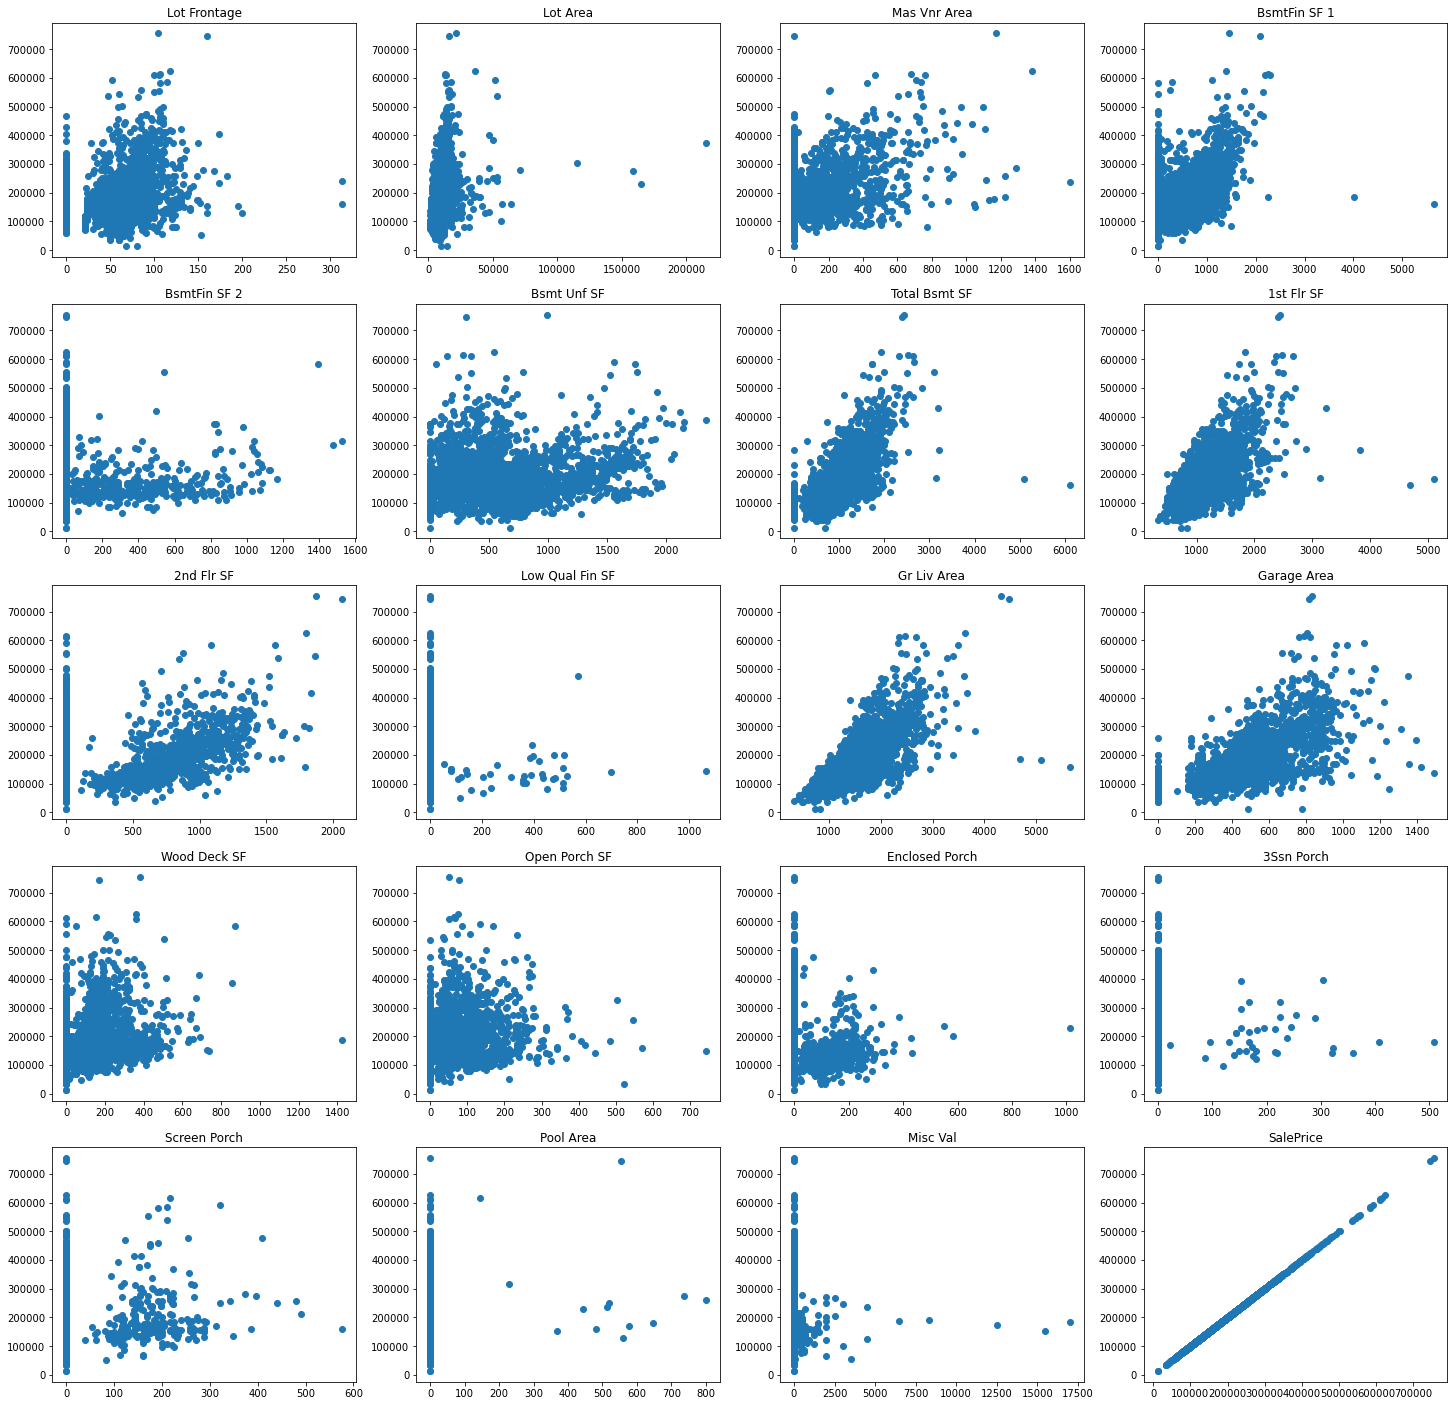

In [7]:
fig,ax = plt.subplots(5,4,figsize=(25,25))
# numerical_output = numerical
# numerical.remove('SalePrice')
num = 0
for i in range(len(ax)):
    for j in range(4):
        ax[i][j].scatter(data_new[numerical[num]],data_new[numerical[-1]])
        ax[i][j].set_title(numerical[num])
        num=num+1

## 3

In [8]:
nominal.remove('PID')
r2_dict = {}
for i in range(len(nominal)):
    temp_df = pd.DataFrame(data_new[nominal[i]])
    enc = OneHotEncoder(handle_unknown='ignore')
    enc_df = pd.DataFrame(enc.fit_transform(temp_df).toarray())
    enc_df['SalePrice'] = data['SalePrice']
    X_train, X_test, y_train, y_test = train_test_split(enc_df.drop('SalePrice',axis=1), enc_df['SalePrice'], test_size=0.2, random_state=0)
    regressor = LinearRegression()  
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    #print('R square:', metrics.r2_score(y_test, y_pred))
    r2_dict[nominal[i]] = metrics.r2_score(y_test, y_pred)

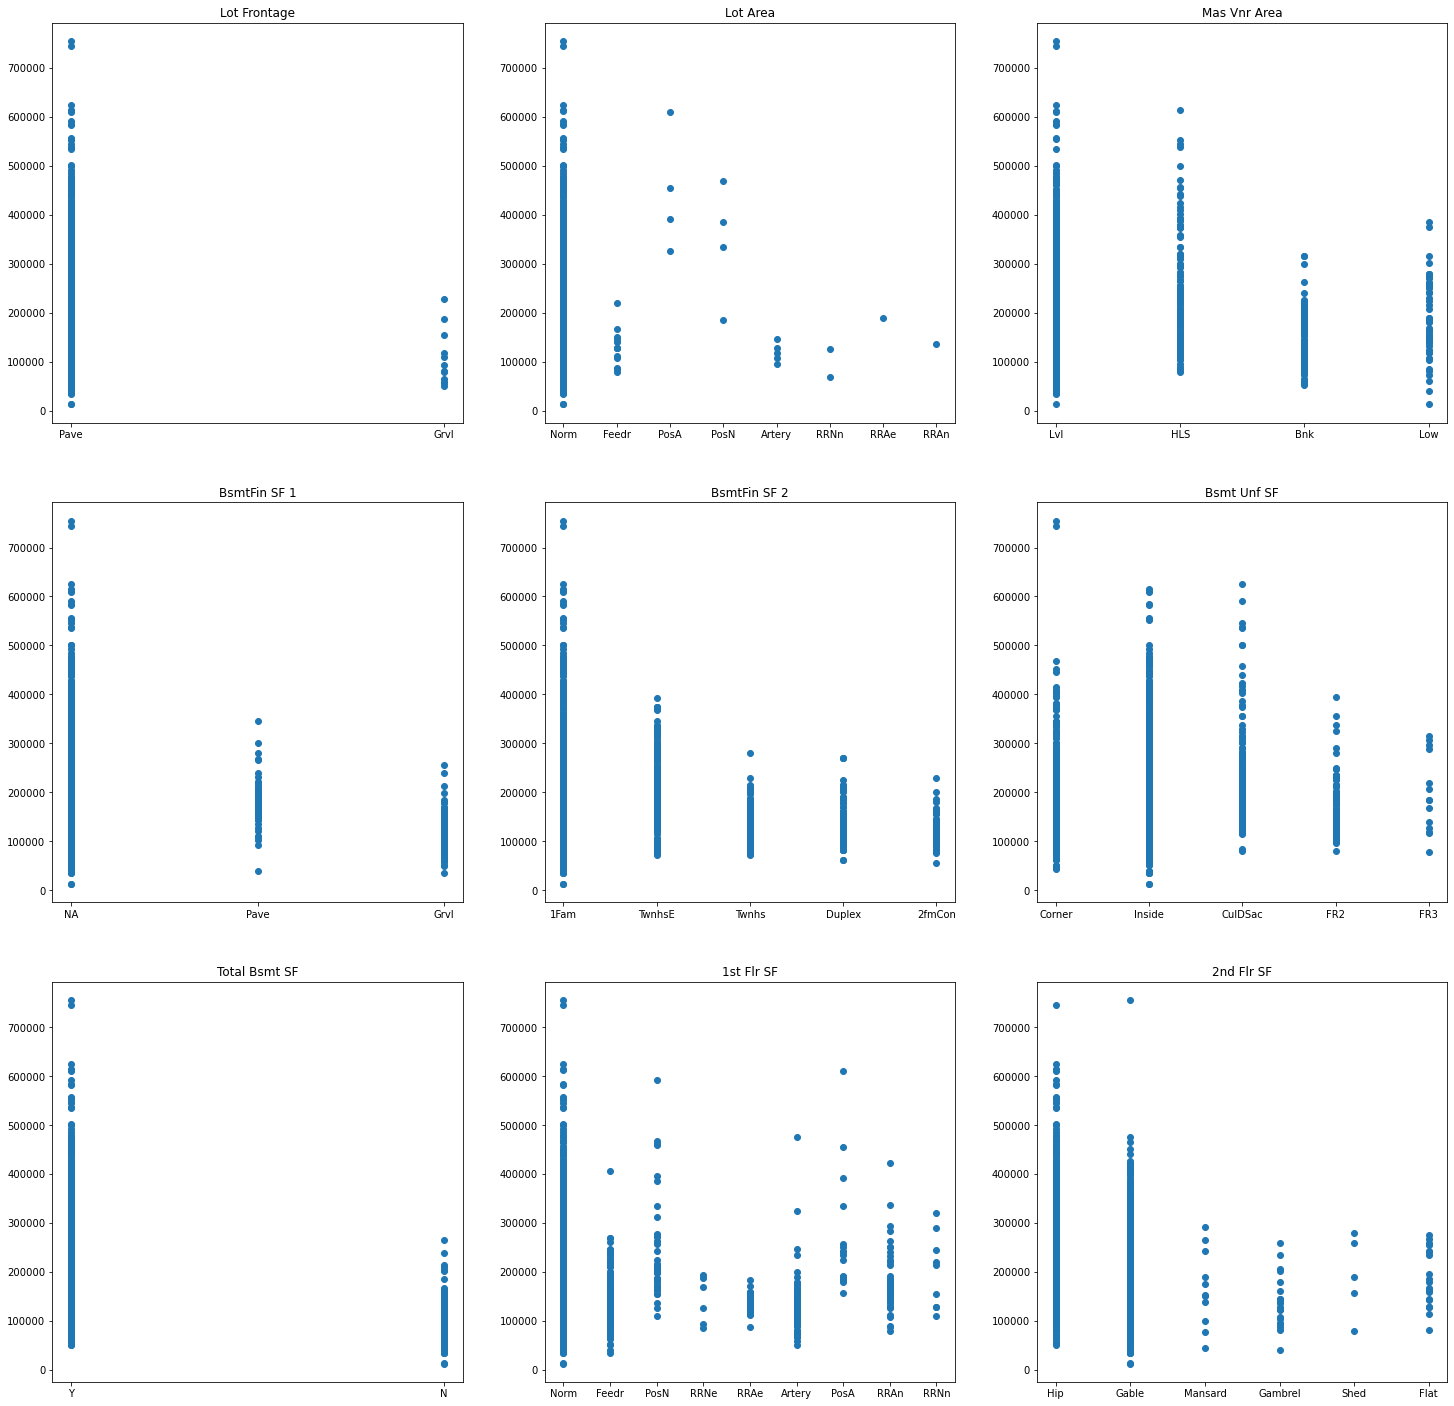

In [9]:
for ele in r2_dict:
    r2_dict[ele] = abs(r2_dict[ele])
sorted_r2 = dict(sorted(r2_dict.items(), key=lambda item: item[1]))
l1 = list(sorted_r2.keys())
fig,ax = plt.subplots(3,3,figsize=(25,25))
num = 0
for i in range(len(ax)):
    for j in range(3):
        ax[i][j].scatter(data_new[l1[num]],data_new[numerical[-1]])
        ax[i][j].set_title(numerical[num])
        num=num+1

## 4

In [10]:
ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Cond','Bsmt Qual',
          'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
          'Fireplace Qu','Garage Finish','Garage Cond','Paved Drive','Pool QC','Fence']

discrete = ['Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath',
           'Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars',
           'Garage Qual','Mo Sold','Yr Sold']

data_ordinal = data[['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Cond','Bsmt Qual',
          'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
          'Fireplace Qu','Garage Finish','Garage Cond','Paved Drive','Pool QC','Fence']]

data_discrete = data[['Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath',
           'Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt','Garage Cars',
           'Garage Qual','Mo Sold','Yr Sold']]
data_ordinal = data_ordinal.fillna('NA')
data_discrete = data_discrete.fillna('NA')

In [11]:
data_new_new = pd.concat([data_new,data_ordinal,data_discrete],axis=1)
data_new_new['Garage Yr Blt'] = data_new_new['Garage Yr Blt'].replace('NA', 
    np.mean(pd.to_numeric(data_new_new['Garage Yr Blt'], errors='coerce')))


data_new_new['Garage Cars'] = data_new_new['Garage Cars'].replace('NA', 
    np.mean(pd.to_numeric(data_new_new['Garage Cars'], errors='coerce')))

In [14]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet


categorical_transformer = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, nominal + ordinal + discrete)
    ]
)
df = data_new_new[nominal + ordinal + discrete]
df = df.loc[:,~df.columns.duplicated()]
df = df.astype(str)
df_new = pd.concat([df,data_numeric],axis=1)
df_new['SalePrice'] = data_new['SalePrice']
#preprocessor.fit_transform(data_new_new[nominal + ordinal + discrete])
X_train, X_test, y_train, y_test = train_test_split(df_new.drop('SalePrice',axis=1), df_new['SalePrice'], test_size=0.2, random_state=0)

clf_ols = Pipeline(
    steps=[('preprocessor',preprocessor),("linear", LinearRegression())]
)


clf_ridgecv = Pipeline(
    steps=[('preprocessor',preprocessor),("ridge", Ridge())]
)

clf_lassocv = Pipeline(
    steps=[('preprocessor',preprocessor),("lasso", Lasso())]
)

clf_elasticcv = Pipeline(
    steps=[('preprocessor',preprocessor),("elastic", ElasticNet())]
)


clf_ols.fit(X_train, y_train)
print("OLS score: %.3f" % clf_ols.score(X_test, y_test))

clf_ridgecv.fit(X_train, y_train)
print("RIDGE score: %.3f" % clf_ridgecv.score(X_test, y_test))

clf_lassocv.fit(X_train, y_train)
print("LASSO score: %.3f" % clf_lassocv.score(X_test, y_test))

clf_elasticcv.fit(X_train, y_train)
print("ELASTICNET score: %.3f" % clf_elasticcv.score(X_test, y_test))

OLS score: 0.809
RIDGE score: 0.835


C:\Users\saija\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 47074974654.83423, tolerance: 1484098736.629161
  model = cd_fast.sparse_enet_coordinate_descent(


LASSO score: 0.817
ELASTICNET score: 0.720


In [15]:
numerical.remove('SalePrice')

from sklearn.linear_model import Ridge,Lasso,ElasticNet

cols = nominal + ordinal + discrete
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

scaling = StandardScaler(with_mean=False)


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, cols),
        ("num",scaling,numerical)
    ],remainder='passthrough'
)

# clf = Pipeline(
#     steps=[("scale", StandardScaler()), ("ridge", Ridge()),('Lasso',Lasso()),('Elasticnet',ElasticNet())]
# )

clf_ols = Pipeline(
    steps=[('preprocessor',preprocessor), ("lin", LinearRegression())]
)


clf_ridge = Pipeline(
    steps=[('preprocessor',preprocessor), ("ridge", Ridge())]
)

clf_lasso = Pipeline(
    steps=[('preprocessor',preprocessor), ("lasso", Lasso())]
)

clf_elastic = Pipeline(
    steps=[('preprocessor',preprocessor),("elastic", ElasticNet())]
)


clf_ols.fit(X_train, y_train)
print("OLS score: %.3f" % clf_ols.score(X_test, y_test))

clf_ridge.fit(X_train, y_train)
print("RIDGE score: %.3f" % clf_ridge.score(X_test, y_test))

clf_lasso.fit(X_train, y_train)
print("LASSO score: %.3f" % clf_lasso.score(X_test, y_test))

clf_elastic.fit(X_train, y_train)
print("ELASTICNET score: %.3f" % clf_elastic.score(X_test, y_test))

OLS score: 0.754
RIDGE score: 0.789


C:\Users\saija\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29767859389.367676, tolerance: 1484098736.629161
  model = cd_fast.sparse_enet_coordinate_descent(


LASSO score: 0.762
ELASTICNET score: 0.779


I initially thought standard scalar would improve the model but instead there is a small decline in the performance of the models.

## 5

In [16]:
from sklearn.model_selection import GridSearchCV

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

scaling = StandardScaler(with_mean=False)


preprocessor = ColumnTransformer(
    transformers=[
        ("cat", categorical_transformer, cols),
        ("num",scaling,numerical)
    ]#,remainder='passthrough'
)



clf_ridge = Pipeline(
    steps=[("preprocessor", preprocessor), ("ridge", Ridge())]
)

param_grid = {'ridge__alpha':[0.001, 0.01, 0.1, 1, 10]}
grid_ridge = GridSearchCV(clf_ridge, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_ridge.fit(X_train, y_train)
print("RIDGE score: %.3f" % grid_ridge.score(X_test, y_test))


clf_lasso = Pipeline(
    steps=[("preprocessor", preprocessor), ("lasso", Lasso())]
)

param_grid = {'lasso__alpha':[0.001, 0.01, 0.1, 1, 10]}
grid_lasso = GridSearchCV(clf_lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_lasso.fit(X_train, y_train)
print("Lasso score: %.3f" % grid_lasso.score(X_test, y_test))




clf_elastic = Pipeline(
    steps=[("preprocessor", preprocessor), ("elastic", ElasticNet())]
)

param_grid = {'elastic__alpha':[0.001, 0.01, 0.1, 1, 10]}
grid_el = GridSearchCV(clf_elastic, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
grid_el.fit(X_train, y_train)
print("Elastic score: %.3f" % grid_el.score(X_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
RIDGE score: 0.819
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Lasso score: 0.783
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Elastic score: 0.820


C:\Users\saija\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:513: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 8441727777.842773, tolerance: 1484098736.629161
  model = cd_fast.sparse_enet_coordinate_descent(


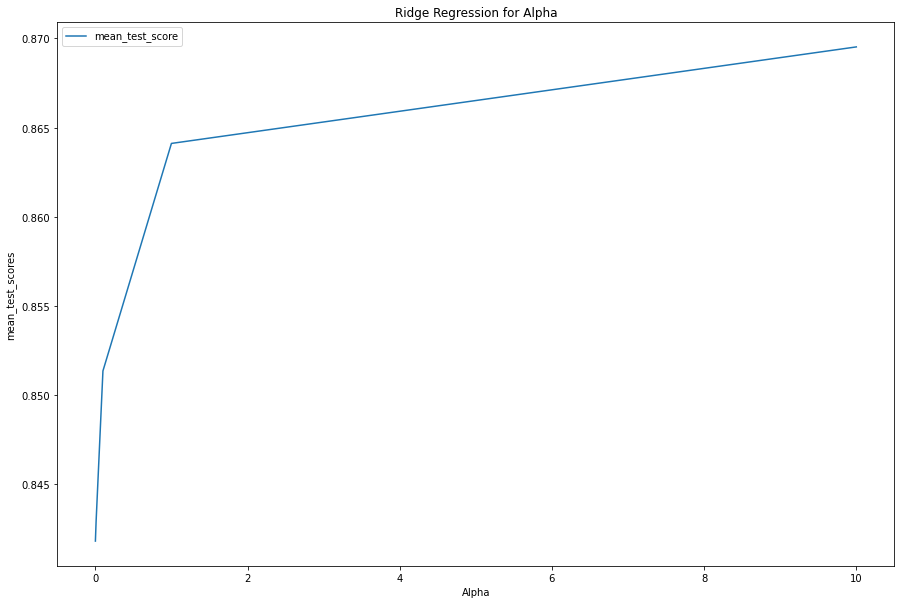

In [17]:
cvalues = [0.001, 0.01, 0.1, 1, 10]
mean_test_scores = np.asarray(grid_ridge.cv_results_['mean_test_score'])
std_test = np.asarray(grid_ridge.cv_results_['std_test_score'])


fig, ax = plt.subplots(figsize=(15,10))

ax.plot(cvalues, mean_test_scores, label='mean_test_score')
ax.set(xlabel='Alpha', ylabel='mean_test_scores',
       title='Ridge Regression for Alpha')
ax.legend(loc='upper left')

plt.show()

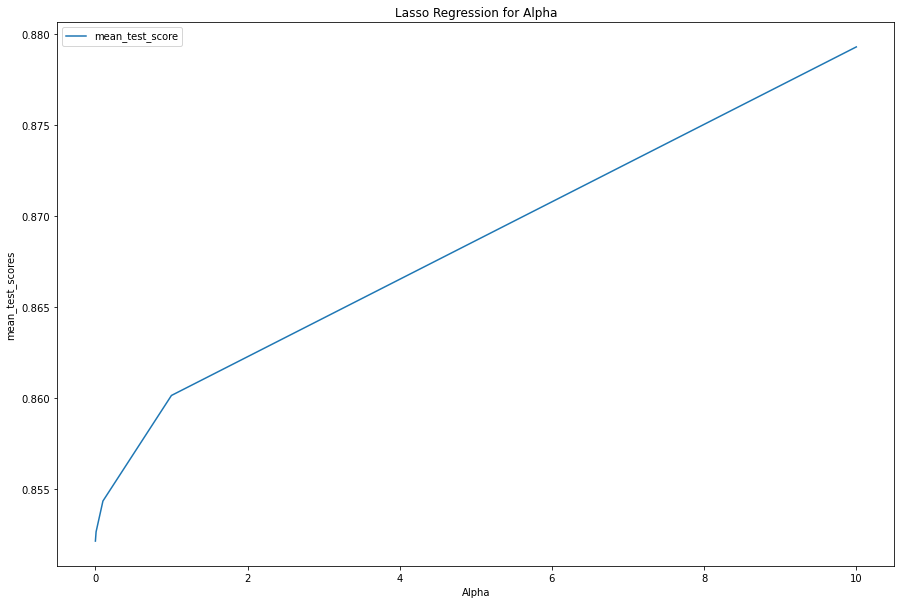

In [18]:
cvalues = [0.001, 0.01, 0.1, 1, 10]
mean_test_scores = np.asarray(grid_lasso.cv_results_['mean_test_score'])
std_test = np.asarray(grid_lasso.cv_results_['std_test_score'])


fig, ax = plt.subplots(figsize=(15,10))

ax.plot(cvalues, mean_test_scores, label='mean_test_score')
ax.set(xlabel='Alpha', ylabel='mean_test_scores',
       title='Lasso Regression for Alpha')
ax.legend(loc='upper left')

plt.show()

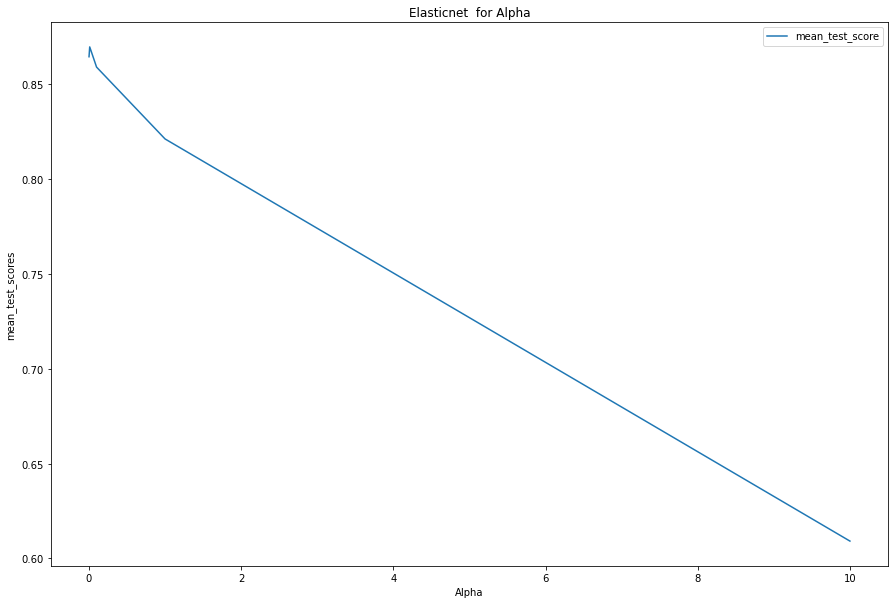

In [19]:
cvalues = [0.001, 0.01, 0.1, 1, 10]
mean_test_scores = np.asarray(grid_el.cv_results_['mean_test_score'])
std_test = np.asarray(grid_el.cv_results_['std_test_score'])


fig, ax = plt.subplots(figsize=(15,10))

ax.plot(cvalues, mean_test_scores, label='mean_test_score')
ax.set(xlabel='Alpha', ylabel='mean_test_scores',
       title='Elasticnet  for Alpha')
ax.legend(loc='upper right')

plt.show()

## 6

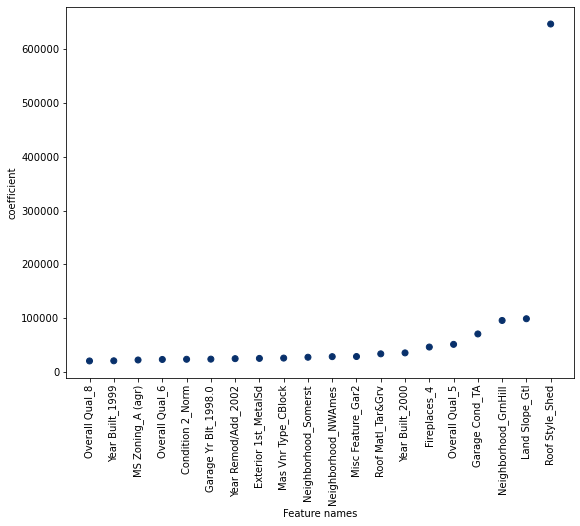

In [20]:
enc = OneHotEncoder(handle_unknown="ignore")
enc.fit_transform(df_new[cols])
enc_vars = list(enc.get_feature_names(cols))



coefs = grid_lasso.best_estimator_.named_steps['lasso'].coef_
importance = np.abs(coefs)
np.array(enc_vars + numerical[:7])


coeff_tuples = []
for index, coeff in enumerate(importance):
    coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
    feature_names.append(np.array(enc_vars + numerical[:7])[index])

coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='Blues_r')
plt.xticks(rotation=90)
plt.show()

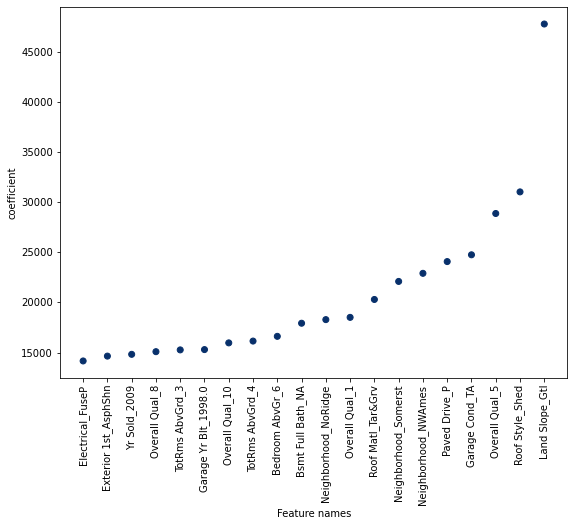

In [21]:
coefs = grid_ridge.best_estimator_.named_steps['ridge'].coef_
importance = np.abs(coefs)
np.array(enc_vars + numerical[:7])


coeff_tuples = []
for index, coeff in enumerate(importance):
    coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
    feature_names.append(np.array(enc_vars + numerical[:7])[index])

coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='Blues_r')
plt.xticks(rotation=90)
plt.show()

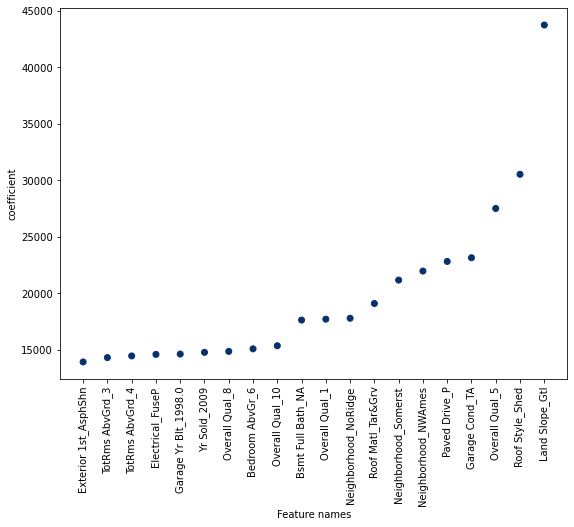

In [22]:
coefs = grid_el.best_estimator_.named_steps['elastic'].coef_
importance = np.abs(coefs)
np.array(enc_vars + numerical[:7])


coeff_tuples = []
for index, coeff in enumerate(importance):
    coeff_tuples.append((index, coeff))
sorted_tuples = sorted(coeff_tuples, key = lambda x: x[1])

best_coeff = sorted_tuples[-20:]
indices = [ tup[0] for tup in best_coeff ]
coeffs = [tup[1] for tup in best_coeff]
# map indices to column names
feature_names = []
for index in indices:
    feature_names.append(np.array(enc_vars + numerical[:7])[index])

coeffs = [tup[1] for tup in best_coeff]

plt.figure(figsize=(20,15))
ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Feature names')
ax11.set_ylabel('coefficient')
ax11.scatter(feature_names, coeffs, c=np.sign(coeffs), cmap='Blues_r')
plt.xticks(rotation=90)
plt.show()